# House price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

## load dataset

In [2]:
train_data_path = r"C:\Users\DELL\Desktop\house_price_prediction\data\train.csv"
test_data_path = r"C:\Users\DELL\Desktop\house_price_prediction\data\test.csv"
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [3]:
print("shape of df_train",df_train.shape)
print("shape of df_test",df_test.shape)

shape of df_train (1460, 81)
shape of df_test (1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# data integration

In [6]:
df = pd.concat([df_train, df_test])

print("shape of integrated data :",df.shape)

shape of integrated data : (2919, 81)


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [10]:
int_features = df.select_dtypes(include = ["int64"]).columns
print("total number of integer features :", int_features.shape[0])

print("integer feature names: ",int_features.tolist())

total number of integer features : 26
integer feature names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features = df.select_dtypes(include = ["float64"]).columns
print("total number of float features :", float_features.shape[0])

print("float feature names: ",float_features.tolist())

total number of float features : 12
float feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
cat_features = df.select_dtypes(include = ["object"]).columns
print("total number of categorical features :", cat_features.shape[0])

print("categorical feature names: ",cat_features.tolist())

total number of categorical features : 43
categorical feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# get  the statistical info of numerical features

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [14]:
df.describe().shape

(8, 38)

# visualise percentage for every features

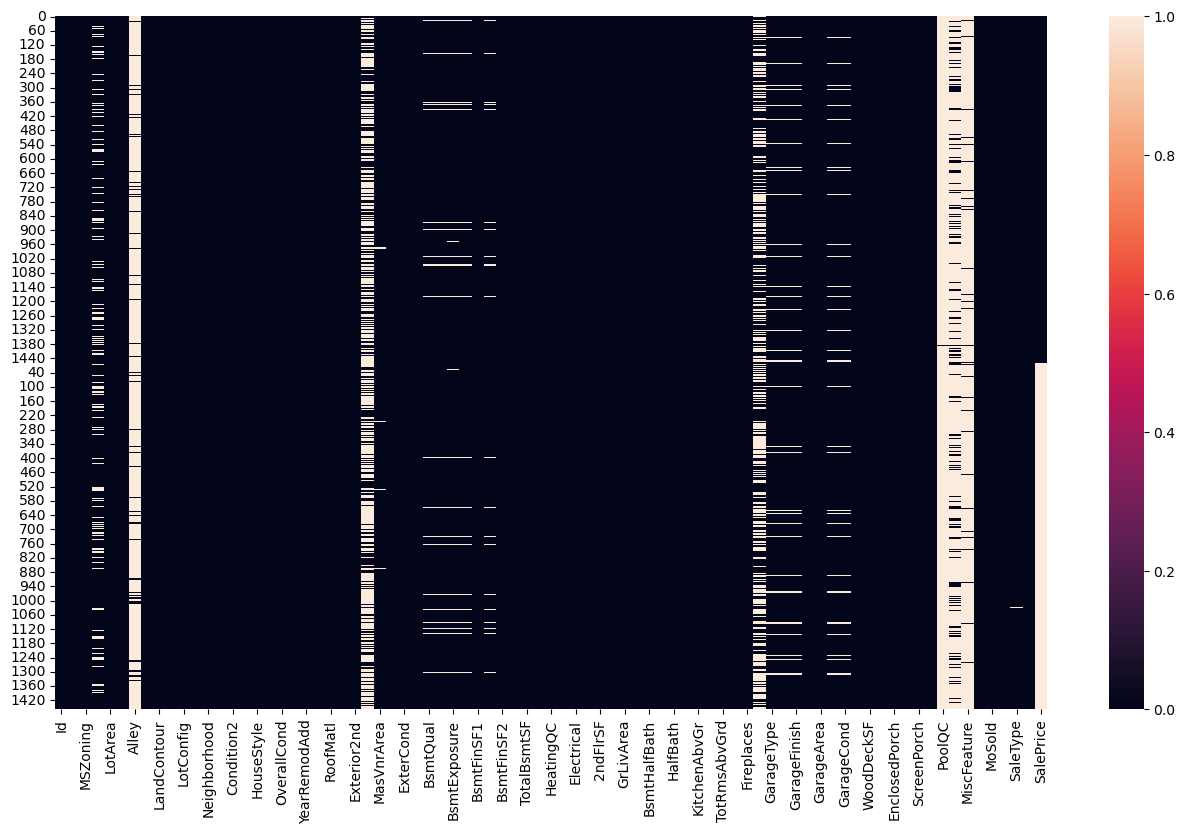

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_of_nukk_value.png")

In [16]:
# set index as id column 
df = df.set_index("Id")

In [17]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [18]:
null_percent = df.isnull().sum()/df.shape[0] *100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

# drop columns/features

In [19]:
"""as per domain knowldge we will not drop those , insead none value we will add constant value NA """
miss_value_50per = null_percent[null_percent > 50]
miss_value_50per

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [20]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [21]:
miss_value_20_50per = null_percent[(null_percent >20) & (null_percent < 51)]
miss_value_20_50per

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [22]:
miss_value_5_20per = null_percent[(null_percent >5) & (null_percent < 21)]
miss_value_5_20per

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [23]:
df ["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

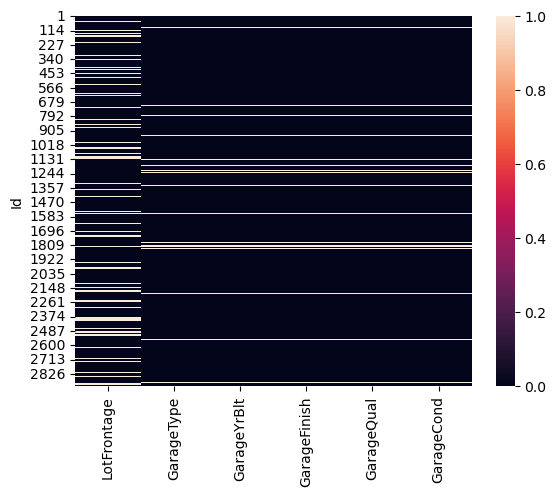

In [24]:
sns.heatmap(df[miss_value_5_20per.keys()].isnull())

# missing value imputation

In [25]:
missing_value_feature = null_percent[null_percent > 0]
print("Total missing value  = ", len(missing_value_feature ))

Total missing value  =  35


In [26]:
missing_value_feature

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [27]:
cat_na_feat = missing_value_feature[missing_value_feature.keys().isin(cat_features)]
print("Total number of catogorical missing value ",len(cat_na_feat))
cat_na_feat

Total number of catogorical missing value  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [28]:
int_na_feat = missing_value_feature[missing_value_feature.keys().isin(int_features)]
print("Total number of catogorical missing value ",len(int_na_feat))
int_na_feat

Total number of catogorical missing value  0


Series([], dtype: float64)

In [29]:
float_na_feat = missing_value_feature[missing_value_feature.keys().isin(float_features)]
print("Total number of catogorical missing value ",len(float_na_feat))
float_na_feat

Total number of catogorical missing value  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### handling MSZoning = 0.137033

In [30]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

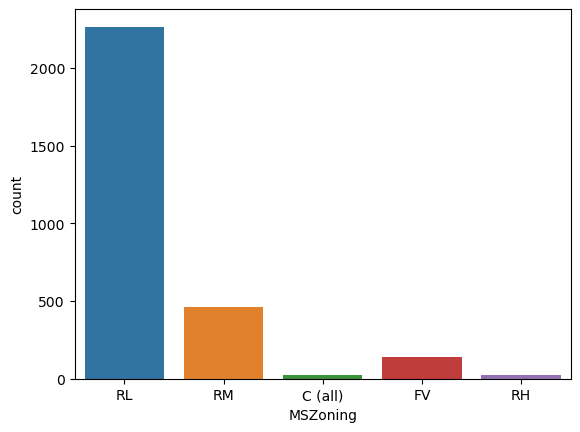

In [31]:
# df.columns
sns.countplot(x = df["MSZoning"],data=df)

In [32]:
## backup of original data 
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [33]:
MSZoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, MSZoning_mode, inplace = True)
df_mvi["MSZoning"].isnull().sum()

0

In [34]:
def oldNewCountplot(df, df_new, feature):
    # print(df)
    # print(df_new)
    # print(feature)
    sns.countplot(x=feature,data=df,hue=df_new['MSZoning'])
    # plt.subplot(121)
    # sns.countplot(df[feature])
    # plt.title("Old data distrubtion")
    # plt.subplot(122)
    # sns.countplot(df_new[feature])
    # plt.title("New data distrubtion")
    


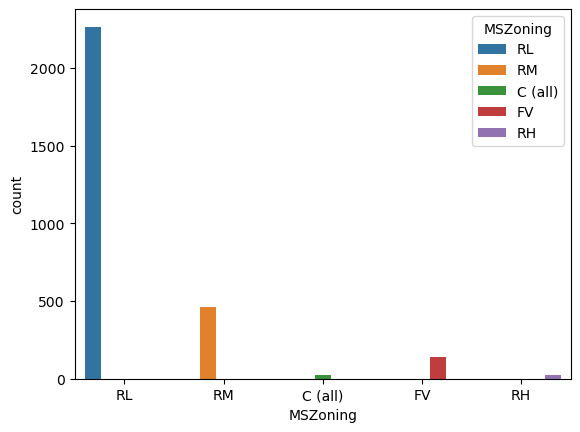

In [35]:
oldNewCountplot(df,df_mvi, "MSZoning")
# oldNewCoounplot(

In [36]:
## handling alley

In [37]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [38]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan,alley_cont, inplace = True)
df_mvi["Alley"].isnull().sum()


0

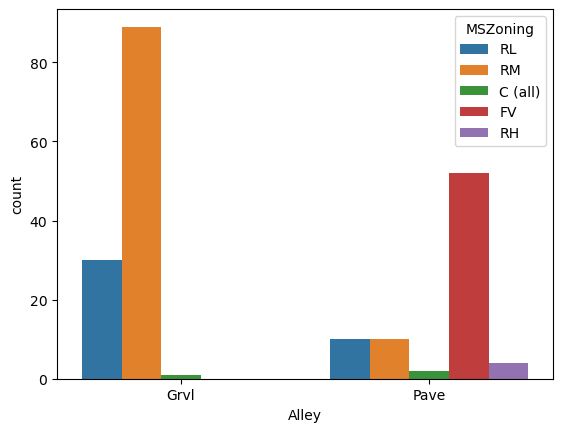

In [39]:
oldNewCountplot(df,df_mvi, "Alley")

In [40]:
### handle lotfrontage = 16.64

In [52]:
def boxhistplot(df,figsize = (10,5)):
    plt.figure(figsize = figsize)
    plt.subplot(121)
    plt.boxplot(df)
    plt.subplot(122)
    sns.histplot(df)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


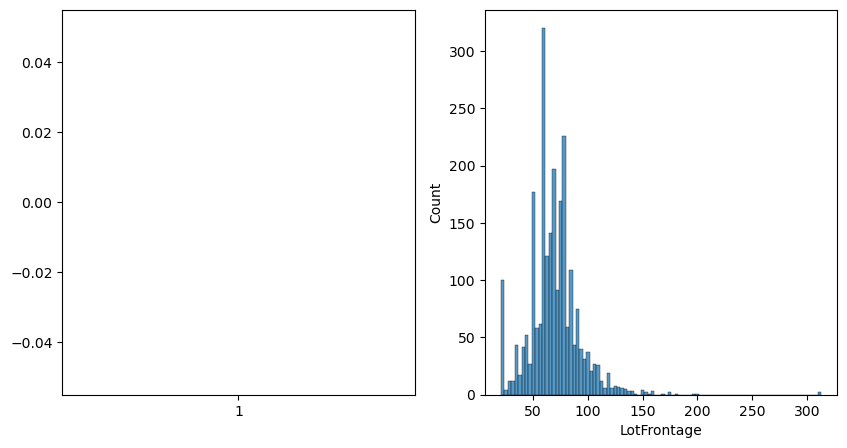

In [53]:
boxhistplot(df["LotFrontage"])

In [43]:
lotfrontage_mean = df["LotFrontage"].mean()
lotfrontage_mean

69.30579531442663

In [44]:
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [64]:
def oldNewBoxHistplot(df, df_new, feature):
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("Old data distrubtion")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("old data distrubtion")
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("new data distrubtion")
    plt.subplot(222)
    sns.distplot(df_new[feature])
    plt.title("New data distrubtion")

KeyError: 0

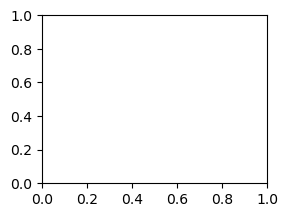

In [65]:
oldNewBoxHistplot(df, df_mvi, "LotFrontage")

In [ ]:
###  handling utilities
df["Utilities"].value_counts()

In [ ]:
utilities_mode =df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace = True)
df_mvi["Utilities"].isnull().sum()

In [ ]:
### handle  Exterior1st and Exterior2nd 
df["Exterior1st"].value_counts()

In [ ]:
df["Exterior2nd"].value_counts()

In [ ]:
exterior1st_mode =df["Exterior1st"].mode()[0]
exterior2nd_mode =df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace = True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace = True)
print("elst 1st ",df_mvi["Exterior1st"].isnull().sum())
print("elst 2nd ",df_mvi["Exterior2nd"].isnull().sum())

In [ ]:
####MasVnrType MasVnrArea
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [ ]:
df[df[["MasVnrType", "MasVnrArea"]].isnull()]

In [ ]:
df["MasVnrType"].value_counts()

In [ ]:
masVnrType_mode =df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,masVnrType_mode, inplace = True)
df_mvi["MasVnrType"].isnull().sum()

In [ ]:
boxhistplot(df["MasVnrArea"])

In [ ]:
masVnrArea_cont= 0
df_mvi["MasVnrArea"].replace(np.nan,masVnrArea_cont, inplace = True)
df_mvi["MasVnrArea"].isnull().sum()

## handling bsmt 

In [ ]:
cat_bsmt_feat =[ 
"BsmtQual",       
"BsmtCond",     
"BsmtExposure",     
"BsmtFinType1",     
"BsmtFinType2" ]

num_bsmt_feat =[
"BsmtFinSF1",
"BsmtFinSF2",       
"BsmtUnfSF" ,       
"TotalBsmtSF",      
"BsmtFullBath",     
"BsmtHalfBath" 
]

In [ ]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [ ]:
for feat in cat_bsmt_feat:
    print(f"value count of (feat): {df[feat].value_counts()}") 

In [ ]:
bsmt_cont= "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace = True)

In [ ]:
df_mvi[cat_bsmt_feat].isnull().sum()

In [ ]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [ ]:
bsmt_num= 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace = True)

In [ ]:
df_mvi[num_bsmt_feat].isnull().sum()

In [ ]:
## handling Electrical       and kitchenQual

In [ ]:
df["Electrical"].value_counts()

In [ ]:
df["KitchenQual"].value_counts()

In [ ]:
df_ekk = df[["Electrical","KitchenQual","KitchenAbvGr" ]]
df_ekk[df_ekk.isnull().any(axis = 1)]

In [ ]:
Electrical_mode =df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,Electrical_mode, inplace = True)
df_mvi["Electrical"].isnull().sum()

In [ ]:
KitchenQual_mode =df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,KitchenQual_mode, inplace = True)
df_mvi["KitchenQual"].isnull().sum()

In [ ]:

Functional
FireplaceQu  
PoolQC
Fence        
MiscFeature

SaleType      

In [ ]:
df["Functional"].value_counts()

In [ ]:
df["SaleType"].value_counts()

In [ ]:
Functional_mode =df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,Functional_mode, inplace = True)
df_mvi["Functional"].isnull().sum()

In [ ]:
SaleType_mode =df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,SaleType_mode, inplace = True)
df_mvi["SaleType"].isnull().sum()

In [ ]:
other_cat_feat = ["FireplaceQu"  ,
"PoolQC",
"Fence"  ,      
"MiscFeature"]
for feat in other_cat_feat:
        print(f"value count of (feat): {df[feat].value_counts()}") 

In [ ]:
FireplaceQu_mode="NA"
df_mvi["FireplaceQu"].replace(np.nan,FireplaceQu_mode, inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

In [ ]:
PoolQC_mode="NA"
df_mvi["PoolQC"].replace(np.nan,PoolQC_mode, inplace = True)
df_mvi["PoolQC"].isnull().sum()

In [ ]:
Fence_mode="NA"
df_mvi["Fence"].replace(np.nan,Fence_mode, inplace = True)
df_mvi["Fence"].isnull().sum()

In [ ]:
MiscFeature_mode="NA"
df_mvi["MiscFeature"].replace(np.nan,MiscFeature_mode, inplace = True)
df_mvi["MiscFeature"].isnull().sum()

In [ ]:
GarageType       
GarageYrBlt     
GarageFinish     
GarageCars      
GarageArea     
GarageQual      
GarageCond     

In [ ]:
cat_garage_feat = ["GarageFinish","GarageArea","GarageQual","GarageCond"]
num_garage_feat = ["GarageType","GarageYrBlt","GarageCars"]

df_garage = df[num_garage_feat  +  cat_garage_feat]
df_garage[df_garage.isnull().any(axis = 1)]

In [ ]:
garage_cont = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont, inplace = True)
df_mvi[cat_garage_feat].isnull().sum()

In [ ]:
garage_num = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan, garage_num, inplace = True)
df_mvi[num_garage_feat].isnull().sum()

In [ ]:
df_mvi.isnull().any(axis = 1).sum()

# Features Transformation

# convert numfeat to catfeat

In [ ]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd",  "GarageYrBlt", "MoSold", "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: dat type = {df_mvi[feat].dtype}")

In [ ]:
df_mvi[for_num_conv].head()

In [ ]:
df_mvi["MoSold"].unique()

In [ ]:
calendar.month_abbr[12]

In [ ]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x :calendar.month_abbr[x] )
df_mvi["MoSold"].unique()


In [ ]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [ ]:
for feat in for_num_conv:
    print(f"{feat}: dat type = {df_mvi[feat].dtype}")

# convert catfeat to num feat

In [ ]:
# ordinal encoding

In [ ]:
ordinal_end_var = [
"Utilities",
"BsmtQual",         
"BsmtCond",        
"BsmtExposure",     
"BsmtFinType1",    
"BsmtFinSF1",       
"BsmtFinType2",   
"KitchenQual",     
"Functional",      
"FireplaceQu",     
"GarageFinish",     
"GarageQual",     
"GarageCond",  
"PoolQC",
"ExterQual",
"ExterCond",
"HeatingQC",
"PavedDrive"
]
print("Total number of features :", len(ordinal_end_var))

In [ ]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories = ["Po", "Fa","TA","Gd","Ex"], ordered = True)).cat.codes

In [ ]:
df_mvi["ExterQual"].unique()

In [ ]:
df_mvi["BsmtExposure"] =df_mvi["BsmtExposure"] .astype(CategoricalDtype(categories = ["No", "NA","Mn","Av","Gd"], ordered = True)).cat.codes
df_mvi["BsmtExposure"]

In [ ]:
df_mvi["BsmtExposure"].value_counts()

In [ ]:
df_mvi["Utilities"] =df_mvi["Utilities"] .astype(CategoricalDtype(categories = ["ELO", "NoSeWa","NoSewr","ALLPub"], ordered = True)).cat.codes
df_mvi["BsmtQual"] =df_mvi["BsmtQual"] .astype(CategoricalDtype(categories = ["NA", "Po","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["BsmtCond"] =df_mvi["BsmtCond"] .astype(CategoricalDtype(categories = ["NA", "Po","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["BsmtFinType1"] =df_mvi["BsmtFinType1"] .astype(CategoricalDtype(categories = ["NA", "Unf","LwQ","Rec","BLQ","ALQ","GLQ"], ordered = True)).cat.codes
df_mvi["BsmtFinType2"] =df_mvi["BsmtFinType2"] .astype(CategoricalDtype(categories = ["NA", "Unf","LwQ","Rec","BLQ","ALQ","GLQ"], ordered = True)).cat.codes
df_mvi["KitchenQual"] =df_mvi["KitchenQual"] .astype(CategoricalDtype(categories = ["Po", "Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["Functional"] =df_mvi["Functional"] .astype(CategoricalDtype(categories = ["Sal", "Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"], ordered = True)).cat.codes
df_mvi["FireplaceQu"] =df_mvi["FireplaceQu"] .astype(CategoricalDtype(categories = ["NA", "Po","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["GarageFinish"] =df_mvi["GarageFinish"] .astype(CategoricalDtype(categories = [ "NA","Unf","RFn","Fin"], ordered = True)).cat.codes
df_mvi["GarageQual"] =df_mvi["GarageQual"] .astype(CategoricalDtype(categories = ["NA", "Po","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["GarageCond"] =df_mvi["GarageCond"] .astype(CategoricalDtype(categories = ["NA", "Po","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["PoolQC"] =df_mvi["PoolQC"] .astype(CategoricalDtype(categories = ["NA","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["ExterCond"] =df_mvi["ExterCond"] .astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["HeatingQC"] =df_mvi["HeatingQC"] .astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd","Ex"], ordered = True)).cat.codes
df_mvi["PavedDrive"] =df_mvi["PavedDrive"] .astype(CategoricalDtype(categories = ["N", "P","Y"], ordered = True)).cat.codes

In [ ]:
df_mvi["ExterCond"].value_counts()

In [ ]:
df_mvi.info()

# one hot encoding for nominal categorical data

In [ ]:
df_encod = df_mvi.copy()
object_features = df_encod.select_dtypes(include ="object").columns.tolist()
print("Total object data types features :", len(object_features))
print("Features: \n ", object_features)

In [ ]:
df_encod[object_features].head(2)

In [ ]:
print("shape of DF before encoding :",df_encod.shape)
df_encod = pd.get_dummies(df_encod,
               columns= object_features,
               prefix = object_features,
               drop_first = True)
print("shape of DF after encoding :",df_encod.shape)

In [ ]:
df_encod.select_dtypes(include = "object").columns.tolist()

# split data for traning and testing

In [ ]:
df_encod.shape

In [ ]:
len_train = df_train.shape[0] 
len_train

In [ ]:
x_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod["SalePrice"][:len_train]
x_test = df_encod[len_train:].drop("SalePrice", axis=1)
print(" shape of x_train data : ", x_train.shape)
print(" shape of y_train data : ", y_train.shape)
print(" shape of x_test data : ", x_test.shape)

 # feature scaling 

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
## formula z = (x-u)/s
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train[:3, :]

In [ ]:
x_test[:3, :]

In [ ]:
sc.mean_.shape

# Train ml model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
svr = SVR()
lr = LinearRegression()
knr = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rfr = RandomForestRegressor()


In [ ]:
models = {"a":["LinearRegression" ,lr],
          "b":["SVR" ,svr],
          "c":["KNeighborsRegressor" ,knr],
          "d":[" DecisionTreeRegressor" ,dt],
          "e":["RandomForestRegressor" ,rfr]
          
         }


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train = x_train, y_train = y_train):
               cv = KFold(n_splits = 7, shuffle = True, random_state = 45)
               r2 = make_scorer(r2_score)
               r2_val_score = cross_val_score(model, x_train,y_train, cv=cv, scoring=r2)
               score = [r2_val_score.mean()]
               return score

In [ ]:
models_score =[]
for model in models:
    print("Traning model :", models[model][0])
    score = test_model(models[model][1],x_train, y_train)
    print("Score of model : ", score)
    
    models_score.append([models[model][0],score[0]])